In [1]:
%load_ext autoreload
%autoreload

In [2]:
from utils_v1 import *


In [3]:
from icecream import ic
import pdb
from sklearn import metrics
import importlib
import utils_v1
import sys
import numpy as np
from src.dataset import (
    MultipleDates,
    PAMultipleDates,
    MTMultipleDates,
    MAMultipleDates,
    MSMultipleDates,
    PIMultipleDates
)

# from src.dataset_legacy import MTDeforestationTime
from src import training_generator as generator
from src.patchesHandler import PatchesHandler, PatchesHandlerMultipleDates, PatchesHandlerEvidential2
from src.manager.multioutput import ManagerMCDropout, ManagerSingleRun, ManagerEnsemble, ManagerEvidential2
from src.Logger import Logger


Tensorflow ver. 2.6.0


In [4]:
ic.configureOutput(includeContext=True)

In [5]:
useLessInferenceRuns = False
reducedInferenceRuns = 30

In [6]:
config = {
	"training": False,
	"inferring": True,
	"site": "PA",
	"training_date": "earlier", # values: earlier, current
	"mode": "evidential2", # values: mcd, single_run, ensemble, evidential2
	"uncertainty_method": "pred_entropy", # pred_var MI pred_entropy KL pred_entropy_single
	"loadInference": False,
	"removePolygons": True,
	"plotLandsat": False,
	"plotPOI": False,

	"save_probabilities": False,
	"addPastDeforestationInput": True,
	"classes_mode": True,
	"learning_rate": 1e-4,
    "use_cloud_mask": True,
    "mask_out_non_biome": False
}

In [7]:



if config['mode'] == 'mcd':
	managerClass = ManagerMCDropout
	config['inference_times'] = 10
	config['training_times'] = 1
elif config['mode'] == 'single_run':
	managerClass = ManagerSingleRun
	config['inference_times'] = 1
	config['training_times'] = 1
	config['uncertainty_method'] = 'pred_entropy_single'
elif config['mode'] == 'ensemble':
	managerClass = ManagerEnsemble
	config['inference_times'] = 10
	config['training_times'] = 10
elif config['mode'] == 'evidential2':
	managerClass = ManagerEvidential2
	config['inference_times'] = 1
	config['training_times'] = 1
else:
	raise ValueError('Invalid mode')

print(config)

if config['site'] == 'PA':
	if config['training'] == True and config['training_date'] == 'earlier':
		dates = [2017, 2018]
	else:
		dates = [2018, 2019]
	datasetClass = PAMultipleDates
elif config['site'] == 'MT':
	if config['training'] == True and config['training_date'] == 'earlier':
		dates = [2018, 2019]
	else:
		dates = [2019, 2020]
	datasetClass = MTMultipleDates
elif config['site'] == 'MS':
	if config['training'] == True and config['training_date'] == 'earlier':
		dates = [2018, 2019]
	else:
		dates = [2019, 2020]
	datasetClass = MSMultipleDates
elif config['site'] == 'PI':
	if config['training'] == True and config['training_date'] == 'earlier':
		dates = [2018, 2019]
	else:
		dates = [2019, 2020]
	datasetClass = PIMultipleDates
else:
	raise ValueError('Invalid site')

dataset = datasetClass(config = config,
			   dates = dates, 
	 	addPastDeforestationInput = config['addPastDeforestationInput'],
		borderBuffer = 2)	

if issubclass(type(dataset), MultipleDates):
	patchesHandler = PatchesHandlerMultipleDates(
		dataset)
elif config['mode'] == 'evidential2':
	patchesHandler = PatchesHandlerEvidential2()
else:
	patchesHandler = PatchesHandler()



if config['training'] == False:

	if type(dataset) == PAMultipleDates:


		if config['training_date'] == 'current': 
			# exp = 6
			repetition_id = 0
			exp = 8

		elif config['training_date'] == 'earlier': 
			exp = 1; repetition_id = 7
			exp = 48; repetition_id = 0
		 
	elif type(dataset) == MTMultipleDates:
		
		if config['training_date'] == 'current': exp = 2; repetition_id = 8
		elif config['training_date'] == 'earlier': exp = 3; repetition_id = 6		

	elif type(dataset) == MSMultipleDates:

		if config['training_date'] == 'current': exp = 4; repetition_id = 0
		elif config['training_date'] == 'earlier': exp = 13; repetition_id = 0		

	elif type(dataset) == PIMultipleDates:

		if config['training_date'] == 'current': exp = 6; repetition_id = 0
		elif config['training_date'] == 'earlier': exp = 1; repetition_id = 0		

else:

	exp = 8
	repetition_id = 0
	
logger = Logger()
manager = managerClass(config, dataset, patchesHandler, logger)
manager.defineExperiment(exp)


{'training': False, 'inferring': True, 'site': 'PA', 'training_date': 'earlier', 'mode': 'evidential2', 'uncertainty_method': 'pred_entropy', 'loadInference': False, 'removePolygons': True, 'plotLandsat': False, 'plotPOI': False, 'save_probabilities': False, 'addPastDeforestationInput': True, 'classes_mode': True, 'learning_rate': 0.0001, 'use_cloud_mask': True, 'mask_out_non_biome': False, 'inference_times': 1, 'training_times': 1}


ic| dataset.py:604 in __init__()- list(self.date_ids): [0]
ic| dataset.py:625 in __init__()
    self.image_channels: [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]]
ic| patchesHandler.py:189 in __init__()- self.input_image_shape: 21
ic| patchesHandler.py:190 in __init__()
    self.dataset.image_channels: [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]]


In [8]:
manager.config

{'training': False,
 'inferring': True,
 'site': 'PA',
 'training_date': 'earlier',
 'mode': 'evidential2',
 'uncertainty_method': 'pred_entropy',
 'loadInference': False,
 'removePolygons': True,
 'plotLandsat': False,
 'plotPOI': False,
 'save_probabilities': False,
 'addPastDeforestationInput': True,
 'classes_mode': True,
 'learning_rate': 0.0001,
 'use_cloud_mask': True,
 'mask_out_non_biome': False,
 'inference_times': 1,
 'training_times': 1,
 'dropout_training': False}

In [9]:
exp

48

In [10]:
manager.setExperimentPath()
manager.createLogFolders()

In [11]:
# ic(type(dataset), exp, dataset.dates)


In [12]:

manager.loadLabel()

D:/Jorge/datasets/deforestation/PA/deforestation_past_years.tif
Loaded deforestation past years


ic| dataset.py:702 in loadLabelFromDate()
    np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Label where deforestation past years is actual date (2019) = 1


ic| dataset.py:705 in loadLabelFromDate()
    np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| dataset.py:709 in loadLabelFromDate()
    np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/PA/deforestation_before_2008_PA.tif


ic| dataset.py:713 in loadLabelFromDate()
    np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([124211220,  38957970], dtype=int64))
ic| dataset.py:715 in loadLabelFromDate()
    np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))
ic| dataset.py:694 in loadLabel()
    label_per_date.shape: (17730, 9203, 1)


Removing bufer................
Mask label shape:  
 (17730, 9203, 1) 
 Unique values:  
 [0 1 2]


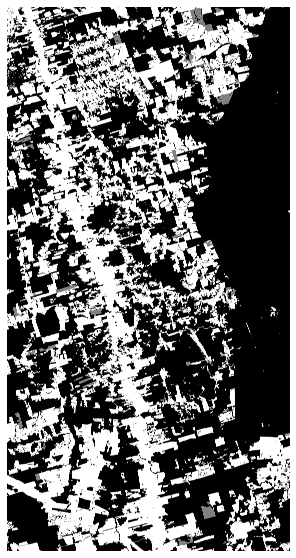

In [13]:
manager.logger.plotFigure(manager.label_mask, 
    name='image_stack_first_channel', cmap=plt.cm.gray, savefig=False, figsize=(10,10))

In [14]:

# Creating tile mask
manager.createTrainValTestTiles()


Tiles size:  3546 2300
Mask size:  (17730, 9200)


In [15]:
def get_pixel_count_set(label, mask, set_id):
    label_set = label[mask == set_id]
    return np.unique(label_set, return_counts=True)


In [16]:

np.unique(manager.mask_tiles)
for set_id in np.unique(manager.mask_tiles):
    print('Set', set_id, get_pixel_count_set(manager.label_mask, manager.mask_tiles, set_id))


Set 1 (array([0, 1, 2], dtype=uint8), array([3848933,   24058, 4282809], dtype=int64))
Set 2 (array([0, 1, 2], dtype=uint8), array([3946794,  155444, 4053562], dtype=int64))
Set 3 (array([0, 1, 2], dtype=uint8), array([3763825,  334071, 4057904], dtype=int64))
Set 4 (array([0, 1, 2], dtype=uint8), array([6200673,  140180, 1814947], dtype=int64))
Set 5 (array([0, 1, 2], dtype=uint8), array([3907717,   93438, 4154645], dtype=int64))
Set 6 (array([0, 1, 2], dtype=uint8), array([4353232,   51100, 3751468], dtype=int64))
Set 7 (array([0, 1, 2], dtype=uint8), array([4994674,   64045, 3097081], dtype=int64))
Set 8 (array([0, 2], dtype=uint8), array([8144807,   10993], dtype=int64))
Set 9 (array([0, 1, 2], dtype=uint8), array([5157160,  137968, 2860672], dtype=int64))
Set 10 (array([0, 1, 2], dtype=uint8), array([3475674,   83519, 4596607], dtype=int64))
Set 11 (array([0, 1, 2], dtype=uint8), array([4649101,  107494, 3399205], dtype=int64))
Set 12 (array([0, 1, 2], dtype=uint8), array([7750220

In [17]:

manager.label_mask.dtype

dtype('uint8')

In [18]:

manager.getLabelCurrentDeforestation()

In [19]:

manager.loadInputImage()

ic| dataset.py:645 in loadInputImage()
    image_stack.shape: (17730, 9203, 21)


Image shape:  (17730, 9203, 21)
mask:  (17730, 9200)
image stack:  (17730, 9200, 21)
ref : (17730, 9200, 1)


In [20]:

np.unique(manager.image_stack[...,0], return_counts=True)

(array([0.        , 0.08333334, 0.16666667, 0.25      , 0.33333334,
        0.4166667 , 0.5       , 0.5833334 , 0.6666667 , 0.75      ,
        0.8333334 , 0.9166667 , 1.        ], dtype=float32),
 array([104050616,   2209014,    644713,    968315,   1458862,   1560879,
          2477424,   1299508,    903419,    864429,   4570932,   3150455,
         38957434], dtype=int64))

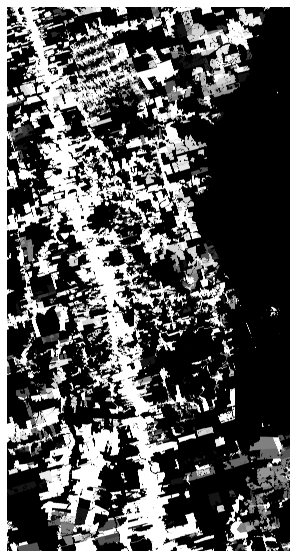

In [21]:

manager.logger.plotFigure(manager.image_stack[...,0], 
    name='image_stack_first_channel', cmap=plt.cm.gray, savefig=False, figsize=(10,10))

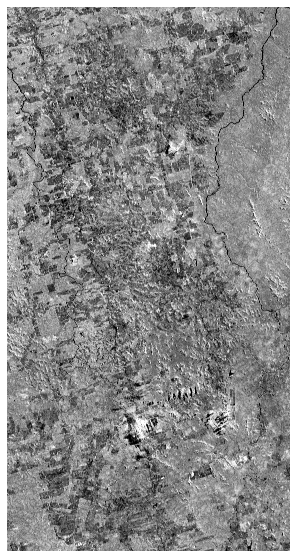

In [22]:

manager.logger.plotFigure(manager.image_stack[...,8], 
    name='image_stack_first_channel', cmap=plt.cm.gray, savefig=False, figsize=(10,10))

In [23]:
np.unique(manager.label_mask, return_counts=True)

(array([0, 1, 2], dtype=uint8),
 array([100903598,   1838508,  60373894], dtype=int64))

In [24]:
# manager.maskNoDataAsNotConsideredClass()

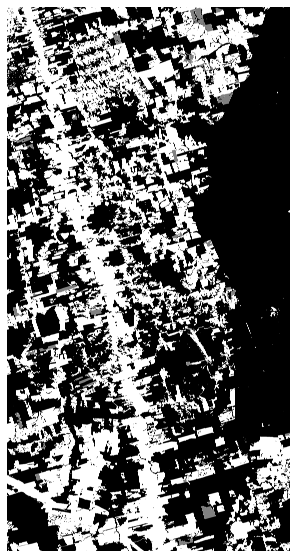

In [25]:

manager.logger.plotFigure(manager.label_mask, 
    name='label_mask', cmap=plt.cm.gray, savefig=False, figsize=(10,10))

In [26]:

manager.getImageChannels()

ic| base.py:150 in getImageChannels()
    self.image_stack.shape: (17730, 9200, 21)
ic| base.py:152 in getImageChannels()- self.channels: 21


In [27]:

manager.getTrainValTestMasks()

Training tiles:  [1, 3, 5, 8, 11, 13, 14, 20]
Validation tiles:  [6, 19]
Test tiles:  [2, 4, 7, 9, 10, 12, 15, 16, 17, 18]


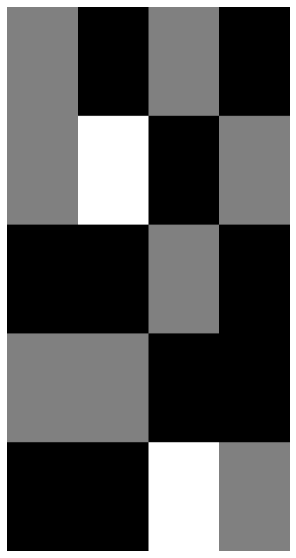

In [28]:
manager.logger.plotFigure(manager.mask_train_val, 
    name='image_stack_first_channel', cmap=plt.cm.gray, savefig=False, figsize=(10,10))


In [29]:

train_unique = get_pixel_count_set(manager.label_mask, manager.mask_train_val, 1)
val_unique = get_pixel_count_set(manager.label_mask, manager.mask_train_val, 2)
test_unique = get_pixel_count_set(manager.label_mask, manager.mask_train_val, 0)

total_unique = np.unique(manager.label_mask, return_counts=True)

In [30]:
print("train unique", train_unique)
print("val unique", val_unique)
print("test unique", test_unique)

print("total unique", total_unique)


train unique (array([0, 1, 2], dtype=uint8), array([38253046,   801988, 26191366], dtype=int64))
val unique (array([0, 1, 2], dtype=uint8), array([9179787,  270914, 6860899], dtype=int64))
test unique (array([0, 1, 2], dtype=uint8), array([53470765,   765606, 27321629], dtype=int64))
total unique (array([0, 1, 2], dtype=uint8), array([100903598,   1838508,  60373894], dtype=int64))


In [31]:
print("train unique percentage", np.round(train_unique[1]/np.sum(train_unique[1]), 4))
print("val unique", np.round(val_unique[1]/np.sum(val_unique[1]), 4))
print("test unique", np.round(test_unique[1]/np.sum(test_unique[1]), 4))

train unique percentage [0.5863 0.0123 0.4014]
val unique [0.5628 0.0166 0.4206]
test unique [0.6556 0.0094 0.335 ]


In [32]:

if config["training"] == True:
    # Extracting patches from the idx matrix
    manager.createIdxImage()


In [33]:
if config["training"] == True:
    manager.extractCoords()

In [34]:
if config["training"] == True:
    manager.trainTestSplit()

In [35]:
if config["training"] == True:
    manager.label_mask.shape

In [36]:
if config["training"] == True:

    manager.logger.plotFigure(manager.label_mask[...,-1], 
        name='Reference', cmap=plt.cm.gray, savefig=False)



In [37]:
if config["training"] == True:
    np.unique(manager.label_mask)

In [38]:
if config["training"] == True:
    print(manager.coords_train)

In [39]:
if config["training"] == True:
    manager.retrieveSamplesOfInterest()

In [40]:
if config["training"] == True:
    inputSnipShow = True

In [41]:
# count, unique = np.unique(label_mask, return_counts=True)
# print(count, unique)
# print(unique[1]/unique[0])

In [42]:
'''
count, unique = np.unique(label_mask[mask_amazon_ts == 1], return_counts=True)
print(count, unique)
print(unique[1]/unique[0])
'''

'\ncount, unique = np.unique(label_mask[mask_amazon_ts == 1], return_counts=True)\nprint(count, unique)\nprint(unique[1]/unique[0])\n'

In [43]:
'''
count, unique = np.unique(label_mask[mask_tr_val == 1], return_counts=True)
print(count, unique)
print(unique[1]/unique[0])
'''

'\ncount, unique = np.unique(label_mask[mask_tr_val == 1], return_counts=True)\nprint(count, unique)\nprint(unique[1]/unique[0])\n'

In [44]:
manager.dataset.image_channels

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]]

In [45]:
manager.dataset.bands

10

In [46]:
if config["training"] == True:
    if inputSnipShow == True:
        manager.snipDataset(idx = 1000)


In [47]:
if config["training"] == True:
    if inputSnipShow == True:
        manager.snipDataset(idx = 97)


In [48]:
if config["training"] == True:
    if inputSnipShow == True:

        manager.snipDataset(idx = 500)

In [49]:
if config["training"] == True:
    if inputSnipShow == True:

        manager.snipDataset(idx = 400)

In [50]:
if config["training"] == True:
    if inputSnipShow == True:

        manager.snipDataset(idx = 400)

In [51]:
if config["training"] == True:
    manager.getGenerators()


In [52]:
if config["training"] == True:
    manager.fixChannelNumber()

In [53]:
if config["training"] == True:
    print(manager.path_exp)

In [54]:
if config["training"] == True:
    print(manager.channels)

In [55]:
if config["training"] == True:
    print(manager.image_stack.shape)

In [56]:
if config["training"] == True:
    print("config['training_times']", config["training_times"])

In [57]:
if config["training"] == True:
    for tm in range(config['training_times']):
        manager.repetition_id = tm
        manager.train()

In [58]:
if config["training"] == True and config["mode"] != 'evidential2':
    manager.plotHistory()


In [59]:
repetition_id = 0

In [60]:
if config["inferring"] != True:
    sys.exit()
else:
    manager.repetition_id = repetition_id

In [61]:
manager.image_stack.shape

(17730, 9200, 21)

In [62]:
manager.patchesHandler.dataset.image_channels[-1]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

In [63]:
if issubclass(type(dataset), MultipleDates):
	manager.channels = manager.patchesHandler.input_image_shape
	manager.image_stack = manager.image_stack[..., manager.patchesHandler.dataset.image_channels[-1]]
	manager.label_mask = manager.label_mask[...,-1]


In [64]:
manager.image_stack.shape

(17730, 9200, 21)

In [65]:
manager.setPadding()

-30.0 -16.0


In [66]:
manager.infer()

ic| multioutput.py:171 in infer()
    self.path_models+ '/' + self.method +'_'+str(self.repetition_id)+'.h5': 'D:/Jorge/datasets/deforestation/experiments/PA/exp48/models/resunet_0.h5'


Dropout training mode: False
time:  0
alpha.shape (17760, 9216, 2)
S.shape (17760, 9216)
K 2
u.shape (17760, 9216)
belief.shape (17760, 9216, 2)
Inference runtime 64.14


In [67]:
manager.prob_rec.shape

(17760, 9216, 2)

In [68]:
manager.loadPredictedProbabilities()

In [69]:
manager.prob_rec.shape

(17760, 9216, 2)

In [70]:
'''
if useLessInferenceRuns == True:
    ic(reducedInferenceRuns)

    prob_rec_all = prob_rec.copy()
    prob_rec = prob_rec_all[:reducedInferenceRuns]
    prob_rec = np.transpose(np.squeeze(prob_rec), (1, 2, 0))
'''

'\nif useLessInferenceRuns == True:\n    ic(reducedInferenceRuns)\n\n    prob_rec_all = prob_rec.copy()\n    prob_rec = prob_rec_all[:reducedInferenceRuns]\n    prob_rec = np.transpose(np.squeeze(prob_rec), (1, 2, 0))\n'

In [71]:
manager.prob_rec.shape

(17760, 9216, 2)

In [72]:
manager.getMeanProb()

In [73]:
manager.logger.getStats(manager.mean_prob)

ic| Logger.py:123 in getStats()
    np.min(value): 0.0
    np.mean(value): 0.25417674
    np.max(value): 0.8333333


In [74]:
ic(manager.mean_prob.shape)

ic| 3703776524.py:1 in <cell line: 1>()
    manager.mean_prob.shape: (17760, 9216, 2)


(17760, 9216, 2)

In [75]:
manager.unpadMeanProb()

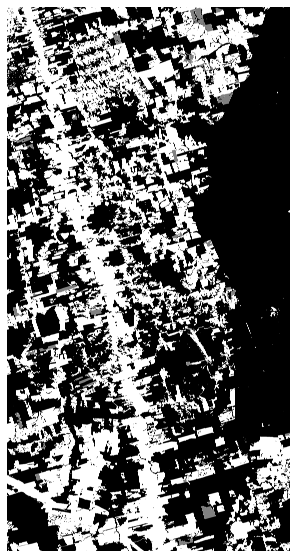

In [76]:
manager.logger.plotFigure(manager.label_mask, 
            name='Reference mask', figsize=(10,10), cmap=plt.cm.gray, savefig=True)

In [77]:
manager.squeezeLabel()

In [78]:
manager.mean_prob.shape

(17730, 9200, 2)

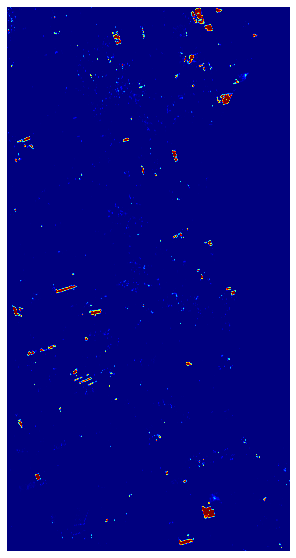

In [79]:
manager.logger.plotFigure(manager.mean_prob[...,1], 
            name='Mean predicted probability', figsize=(10,10), cmap='jet', savefig=False)

In [80]:
print(manager.label_mask.shape)

(17730, 9200)


In [81]:
# manager.getLabelTest()

In [82]:
# manager.getMAP()

In [83]:
manager.prob_rec.shape

(17760, 9216, 2)

In [84]:
# manager.preprocessProbRec()
# print(manager.prob_rec.shape)

In [85]:
manager.prob_rec.shape

(17760, 9216, 2)

In [86]:
manager.logger.getStats(manager.prob_rec)

ic| Logger.py:123 in getStats()
    np.min(value): 0.0
    np.mean(value): 0.25417674
    np.max(value): 0.8333333


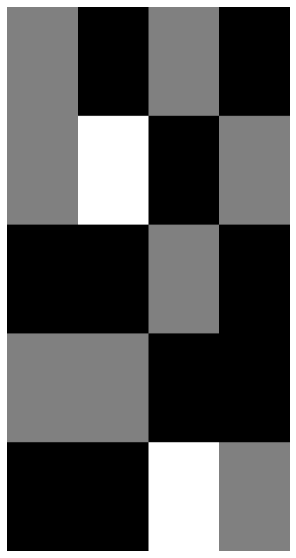

In [87]:
manager.logger.plotFigure(manager.mask_train_val, 
            name=manager.dataset.site + manager.title_name + ' Train val mask.png', figsize=(10,10), savefig=False)

In [88]:
manager.getLabelCurrentDeforestation()

In [89]:
manager.classes_mode

True

In [90]:
manager.applyProbabilityThreshold()

(17730, 9200, 2)


In [91]:
manager.setMeanProbNotConsideredAreas()


In [92]:
manager.getTestValues()

ic| base.py:488 in getTestValues()- predicted_test.shape: (81558000,)
ic| base.py:497 in getTestValues()- predicted_test.shape: (54236371,)


In [93]:
manager.removeSmallPolygons()

ic| metrics.py:213 in removeSmallPolygonsForMetrics()
    np.unique(predicted, return_counts=True): (array([0, 1], dtype=int8), array([161082253,   2033747], dtype=int64))
    np.unique(predicted_larger_than_min_area, return_counts=True): (array([0, 1], dtype=int8), array([161386109,   1729891], dtype=int64))
ic| metrics.py:215 in removeSmallPolygonsForMetrics()
    np.unique(ignored_polygons, return_counts=True): (array([0, 1], dtype=int8), array([162812144,    303856], dtype=int64))


In [94]:
manager.calculateMetrics()

ic| base.py:541 in calculateMetrics()
    self.f1: 80.76
    self.precision: 82.4
    self.recall: 79.19


In [95]:
manager.getValidationValuesForMetrics()
manager.calculateMetricsValidation()

ic| multioutput.py:249 in getValidationValuesForMetrics()
    self.label_mask_val.shape: (16311600,)
ic| multioutput.py:255 in getValidationValuesForMetrics()
    self.label_mask_val_valid.shape: (9413174,)
ic| base.py:552 in calculateMetricsValidation()
    f1_val: 80.05
    precision_val: 74.08
    recall_val: 87.05
    mAP_val: 80.13


In [96]:
calculateMAPWithoutSmallPolygons = False
if calculateMAPWithoutSmallPolygons == True:
    manager.calculateMAPWithoutSmallPolygons()

In [97]:
manager.get_label_no_buffer()

D:/Jorge/datasets/deforestation/PA/deforestation_past_years.tif
Loaded deforestation past years


ic| dataset.py:702 in loadLabelFromDate()
    np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Label where deforestation past years is actual date (2019) = 1


ic| dataset.py:705 in loadLabelFromDate()
    np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| dataset.py:709 in loadLabelFromDate()
    np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/PA/deforestation_before_2008_PA.tif


ic| dataset.py:713 in loadLabelFromDate()
    np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([124211220,  38957970], dtype=int64))
ic| dataset.py:715 in loadLabelFromDate()
    np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))
ic| dataset.py:694 in loadLabel()
    label_per_date.shape: (17730, 9203, 1)


In [98]:
manager.getErrorMask()

(array([0, 1], dtype=int16), array([162345259,    770741], dtype=int64))


In [99]:
manager.getErrorMaskToShowRGB()

[0 1]


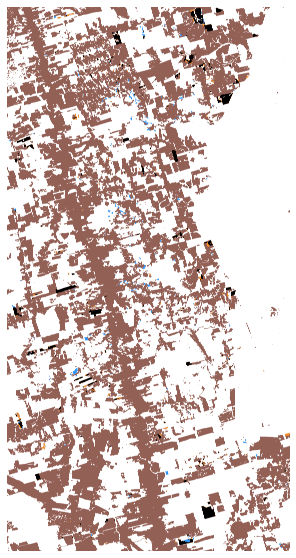

In [100]:
manager.logger.plotFigure(manager.error_mask_to_show_rgb[...,::-1], 
            name=manager.dataset.site + manager.title_name + ' error mask color.png', 
            figsize=(10,10), savefig=True, dpi=300)

In [101]:
'''
import types

manager.setUncertainty = types.MethodType(setUncertainty, manager)
'''


'\nimport types\n\nmanager.setUncertainty = types.MethodType(setUncertainty, manager)\n'

In [102]:
manager.setUncertainty()

In [103]:
manager.uncertainty_map[manager.uncertainty_map>1] = 1

In [104]:
manager.logger.getStats(manager.uncertainty_map)

ic| Logger.py:123 in getStats()
    np.min(value): 0.16666667
    np.mean(value): 0.4916469
    np.max(value): 1.0


In [105]:
manager.getUncertaintyToShow()
manager.logger.getStats(manager.uncertainty_to_show)


ic| Logger.py:123 in getStats()
    np.min(value): 0.0
    np.mean(value): 0.12563011
    np.max(value): 1.0


ic| 3944692317.py:4 in <cell line: 4>()
    manager.uncertainty_to_show.shape: (17730, 9200)


(17730, 9200)

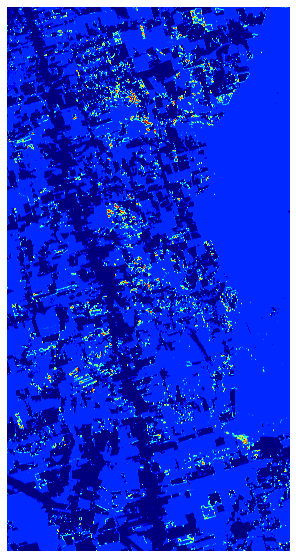

In [106]:

manager.logger.plotFigure(manager.uncertainty_to_show, 
            name=manager.dataset.site + manager.title_name + ' uncertainty '+manager.config['uncertainty_method']+'.png', figsize=(10,10), cmap='jet', savefig=True)

ic(manager.uncertainty_to_show.shape)



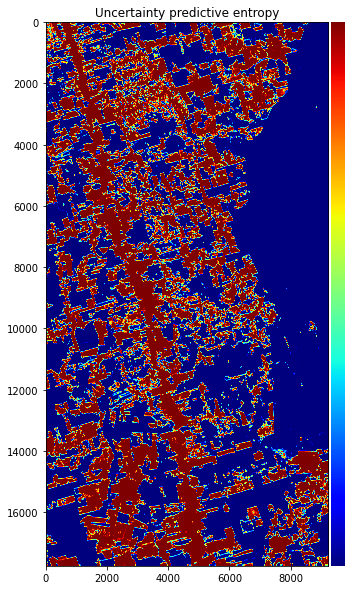

In [107]:

import src.uncertainty
fig, ax = plt.subplots(1,1,figsize=(10,10))
src.uncertainty.show_im(manager.uncertainty_map, ax, title = 'Uncertainty predictive entropy')
plt.axis('off')
plt.savefig('output/figures/Para' + manager.title_name + ' uncertainty '+manager.config['uncertainty_method']+'.png', 
    dpi=150, bbox_inches='tight')

In [108]:
manager.getValidationValues2()
manager.getTestValues2()

ic| base.py:592 in getTestValues2()
    self.label_mask.shape: (17730, 9200)
ic| base.py:593 in getTestValues2()
    self.mask_test.shape: (17730, 9200)
ic| base.py:597 in getTestValues2()
    self.label_mask_test.shape: (81558000,)
ic| base.py:605 in getTestValues2()
    self.error_mask_test.shape: (54091459,)


In [109]:
import src.plot as _plt
'''
def plotCropSample(self, manager):
    uncertainty_vlims = [np.min(manager.uncertainty_to_show), np.max(manager.uncertainty_to_show)]

    self.plotCropSampleFlag = True
    if self.plotCropSampleFlag == True:
        ic(manager.dataset.previewLims1, manager.dataset.previewLims2)
        lims = manager.dataset.previewLims1
        ic(np.unique(manager.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]]))
        lims = manager.dataset.previewLims2
        ic(np.unique(manager.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]], return_counts=True))

        _plt.plotCropSample4(manager.image_stack[...,manager.dataset.previewBandsSnip[-1]], manager.mean_prob[...,1], 
                manager.error_mask_to_show_rgb[...,::-1], manager.uncertainty_to_show, 
                lims = manager.dataset.previewLims1, 
                titles = ['Snippet', 'Predicted Probability', 'Predicted', 'Uncertainty'],
                cmaps = [plt.cm.gray, 'jet', plt.cm.gray, 'jet'],
                maskBackground = [False, True, False, True],
                invertMask = [False, False, False, False], uncertainty_vlims = uncertainty_vlims)
        save_name = 'output/figures/{}PredictSampleUncertainty1_exp{}.png'.format(
            manager.dataset.__class__.__name__, str(manager.exp))
        plt.savefig(save_name, dpi=150, bbox_inches='tight')

        _plt.plotCropSample4(manager.image_stack[...,manager.dataset.previewBandsSnip[-1]], manager.mean_prob[...,1], 
                manager.error_mask_to_show_rgb[...,::-1], manager.uncertainty_to_show, 
                lims = manager.dataset.previewLims2, 
                titles = ['Snippet', 'Predicted Probability', 'Predicted', 'Uncertainty'],
                cmaps = [plt.cm.gray, 'jet', plt.cm.gray, 'jet'],
                maskBackground = [False, True, False, True],
                invertMask = [False, False, False, False], uncertainty_vlims = uncertainty_vlims)
        save_name = 'output/figures/{}PredictSampleUncertainty2_exp{}.png'.format(
            manager.dataset.__class__.__name__, str(manager.exp))
        plt.savefig(save_name, dpi=150, bbox_inches='tight')

        _plt.plotCropSample4(manager.image_stack[...,manager.dataset.previewBandsSnip[-1]], manager.mean_prob[...,1], 
                manager.error_mask_to_show_rgb[...,::-1], manager.uncertainty_to_show, 
                lims = manager.dataset.previewLims2, 
                titles = ['Snippet', 'Predicted Probability', 'Predicted', 'Uncertainty'],
                cmaps = [plt.cm.gray, 'jet', plt.cm.gray, 'jet'],
                maskBackground = [False, True, False, True],
                invertMask = [False, False, False, False], uncertainty_vlims = uncertainty_vlims,
                colorbar = True)
        plt.savefig('output/figures/' + manager.dataset.__class__.__name__ + 'PredictSampleUncertaintyColorbar.png', dpi=150, bbox_inches='tight')
'''

"\ndef plotCropSample(self, manager):\n    uncertainty_vlims = [np.min(manager.uncertainty_to_show), np.max(manager.uncertainty_to_show)]\n\n    self.plotCropSampleFlag = True\n    if self.plotCropSampleFlag == True:\n        ic(manager.dataset.previewLims1, manager.dataset.previewLims2)\n        lims = manager.dataset.previewLims1\n        ic(np.unique(manager.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]]))\n        lims = manager.dataset.previewLims2\n        ic(np.unique(manager.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]], return_counts=True))\n\n        _plt.plotCropSample4(manager.image_stack[...,manager.dataset.previewBandsSnip[-1]], manager.mean_prob[...,1], \n                manager.error_mask_to_show_rgb[...,::-1], manager.uncertainty_to_show, \n                lims = manager.dataset.previewLims1, \n                titles = ['Snippet', 'Predicted Probability', 'Predicted', 'Uncertainty'],\n                cmaps = [plt.cm.gray, 'jet', plt.cm.gray, 'jet'],\n             

In [110]:

# import types
# manager.logger.plotCropSample = types.MethodType(plotCropSample, manager.logger)


In [112]:
## manager.logger.plotCropSample(manager)

In [113]:
if config["plotLandsat"] == True:
    label_tmp_dates = []
    for date in dataset.prodes_dates:
        label_tmp_date = dataset.loadLabelFromDate(date)
        label_tmp_date = label_tmp_date[:manager.mask_tiles.shape[0], :manager.mask_tiles.shape[1]]
        label_tmp_dates.append(label_tmp_date)

In [114]:
if config["plotLandsat"] == True:
    # del manager.image_stack
    import src.lansdatLoader as ll
    import importlib
    importlib.reload(ll)
    landsatLoader = ll.LandsatLoader(dataset)
    ims = landsatLoader.load()
    for idx in range(len(ims)):
        ims[idx] = ims[idx][:manager.mask_tiles.shape[0], :manager.mask_tiles.shape[1],:]
    ims = landsatLoader.darken_past_deforestation(ims, manager.label_no_buffer)
    ims = landsatLoader.add_deforestation_edges_by_date(ims, label_tmp_dates[:])

In [115]:
if config["plotLandsat"] == True:
    logger.plotCropSampleLandsat(manager, ims)

In [116]:
# manager.logger.plotCropSampleT0T1(manager)

In [117]:
manager.logger.getStats(manager.uncertainty)


ic| Logger.py:123 in getStats()
    np.min(value): 0.16666667
    np.mean(value): 0.19513403
    np.max(value): 1.0


In [118]:
'''
manager.getOtherUncertaintyMetrics()
print(manager.sUEO)

print(manager.ece_score)  
'''

'\nmanager.getOtherUncertaintyMetrics()\nprint(manager.sUEO)\n\nprint(manager.ece_score)  \n'

In [119]:
if config["plotPOI"] == True and config['site'] == 'PA':

    print(manager.mean_prob.shape)
    font = {'family': "Times New Roman",
            'color':  'white',
            'weight': 'bold',
            'size': 24,
            }

    lims = dataset.previewLims1
    im = manager.uncertainty_map[lims[0]:lims[1], lims[2]:lims[3]]
    plt.figure(figsize=(10,10))
    plt.imshow(im, cmap='jet')

    letters = ['A', 'B', 'C', 'D', 'E', 'F']

    for poi_id in range(4):
            
            plt.text(manager.dataset.snippet_coords['snippet_id0'][poi_id][1], 
                    manager.dataset.snippet_coords['snippet_id0'][poi_id][0], 
                    letters[poi_id], fontdict=font)
    plt.axis('off')

    plt.savefig(os.path.join('output/pdf_plot_results', 
                            'pdf_plot_poi0.png'), 
    dpi=150, bbox_inches='tight')

    lims = dataset.previewLims2
    im = manager.uncertainty_map[lims[0]:lims[1], lims[2]:lims[3]]
    plt.figure(figsize=(10,10))
    plt.imshow(im, cmap='jet')

    letters = ['E', 'F']

    print(manager.dataset.snippet_coords['snippet_id1'])
    for poi_id in range(2):
            
            plt.text(manager.dataset.snippet_coords['snippet_id1'][poi_id][1], 
                    manager.dataset.snippet_coords['snippet_id1'][poi_id][0], 
                    letters[poi_id], fontdict=font)
    plt.axis('off')
            
    plt.savefig(os.path.join('output/pdf_plot_results', 
                            'pdf_plot_poi1.png'), 
    dpi=150, bbox_inches='tight')

In [120]:
if config["plotPOI"] == True and config['site'] == 'PA':
    manager.getPOIValues()


In [121]:

if config["plotPOI"] == True and config['site'] == 'PA':
    import pickle
    with open('output/log/log_ensemble_.pkl', 'wb') as f:
                pickle.dump(manager.snippet_poi_results, f)


In [122]:
manager.config['uncertainty_method'] = 'evidential2'

In [123]:
from src import metrics as _metrics

def getUncertaintyAAValues(self):



    # self.threshold_list = [0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.25, 0.27, 0.3, 0.34, 0.36]

    # self.threshold_list = [0.005, 0.0075, 0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.25, 0.27, 0.3, 0.34, 0.36, np.max(uncertainty)-0.003]
    if self.config['uncertainty_method'] == "pred_entropy_single":
        self.threshold_list = [0.0075, 0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.225, 
                            0.25, 0.27, 0.3, 0.34, 0.36, np.max(self.uncertainty)-0.003, np.max(self.uncertainty)-0.0015]
    if self.config['uncertainty_method'] == "pred_entropy":
            if self.classes_mode == False:
                    self.threshold_list = [0.0025, 0.005, 0.0075, 0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.225, 
                            0.25, 0.27, 0.3, 0.34, 0.36, np.max(self.uncertainty)-0.003, np.max(self.uncertainty)-0.0015]
                    # self.threshold_list = [0.0025, 0.025, 0.05, 0.1, 0.2, 0.4, 
                    #         0.5, 0.6, 0.7, 0.8, 0.9, np.max(self.uncertainty)-0.003, np.max(self.uncertainty)-0.0015]
            else:
                    self.threshold_list = [0.0025, 0.025, 0.05, 0.075, 0.1, 0.2, 0.4, 
                    0.5, 0.6, 0.7, 0.8, 0.9, np.max(self.uncertainty)-0.003, np.max(self.uncertainty)-0.0015]
                    
                    # self.threshold_list = [0.13, 0.15, 0.2, 0.225, 
                    # 0.25, 0.27, 0.3, 0.34, 0.36, 0.45, 0.55, 0.65, 0.8]
    elif self.config['uncertainty_method'] == "pred_var":
            self.threshold_list = [0.0025, 0.005, 0.0075, 0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.225, 
                    0.25, 0.27, 0.3, 0.34, 0.36]
            self.threshold_list = [x*0.13/0.36 for x in self.threshold_list] + [np.max(self.uncertainty)-0.0015, np.max(self.uncertainty)-0.0008]
    elif self.config['uncertainty_method'] == "MI":
            self.threshold_list = [0.0025, 0.005, 0.0075, 0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.225, 
                    0.25, 0.27, 0.3, 0.34, 0.36]
            self.threshold_list = [x*0.235/0.36 for x in self.threshold_list] + [np.max(self.uncertainty)-0.003, np.max(self.uncertainty)-0.0015]
    elif self.config['uncertainty_method'] == "KL":
            self.threshold_list = [0.0025, 0.005, 0.0075, 0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.225, 
                    0.25, 0.27, 0.3, 0.34, 0.36]
            self.threshold_list = [x*1.0/0.36 for x in self.threshold_list] + [np.max(self.uncertainty)-0.006, np.max(self.uncertainty)-0.003]
    elif self.config['uncertainty_method'] == "evidential":
            # self.threshold_list = [0.015, 0.03, 0.04]
            self.threshold_list = [0.0025, 0.005, 0.0075, 0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.225, 
                    0.25, 0.27, 0.3, 0.34, 0.36]
            self.threshold_list = [ 0.15, 0.2, 0.225, 
                    0.25, 0.27, 0.3, 0.34, 0.36]
            self.threshold_list = [ 0.15, 0.2, 0.225, 
                    0.25, 0.27, 0.3, 0.34, 0.36, 0.45, 0.55, 0.65, 0.8]

            self.threshold_list = [0.13, 0.15, 0.2, 0.225, 
                    0.25, 0.27, 0.3, 0.34, 0.36, 0.45, 0.55, 0.65, 0.8]

            # self.threshold_list = [ 0.15, 0.2,  
            #          0.3, 0.35, 0.4, 0.5, 0.6, 0.7]

            # self.threshold_list = [0.015,0.1, 0.2, 0.27, 0.36, 0.45, 0.55, 0.65]

            # self.threshold_list = [x*1.0/0.36 for x in self.threshold_list] + [np.max(uncertainty)-0.006, np.max(uncertainty)-0.003]
                    
            # self.threshold_list = np.linspace(np.min(uncertainty) + 0.0015, np.max(uncertainty) - 0.0015, 19)
    elif self.config['uncertainty_method'] == "evidential2":
                self.threshold_list = list(np.linspace(np.min(self.uncertainty)+0.0000001, np.max(self.uncertainty)-0.005, 11))[1:]

    print(self.threshold_list)
    self.loadThresholdMetrics = False
    if self.loadThresholdMetrics == False:
            # self.threshold_list = [0.1]
            # y_test
            ic(self.uncertainty.shape, self.label_mask_current_deforestation_test.shape)

            metrics_values = _metrics.getAA_Recall(self.uncertainty, 
                    self.label_mask_current_deforestation_test, 
                    self.predicted_test, self.threshold_list)

            # ic(metrics_values)


    self.m = {'precision_L': metrics_values[:,0],
            'recall_L': metrics_values[:,1],
            'recall_Ltotal': metrics_values[:,2],
            'AA': metrics_values[:,3],
            'precision_H': metrics_values[:,4],
            'recall_H': metrics_values[:,5],
            'UEO': metrics_values[:,6]}

    self.m['f1_L'] = 2*self.m['precision_L']*self.m['recall_L']/(self.m['precision_L']+self.m['recall_L'])
    self.m['f1_H'] = 2*self.m['precision_H']*self.m['recall_H']/(self.m['precision_H']+self.m['recall_H'])


In [124]:

import types

manager.getUncertaintyAAValues = types.MethodType(getUncertaintyAAValues, manager)


Get precision-recall threshold

In [125]:

manager.getUncertaintyAAValues()

ic| 4112614954.py:65 in getUncertaintyAAValues()
    self.uncertainty.shape: (54091459,)
    self.label_mask_current_deforestation_test.shape: (54091459,)


[0.24950009447034838, 0.3323334173069763, 0.4151667401436043, 0.49800006298023225, 0.5808333858168602, 0.6636667086534882, 0.7465000314901162, 0.829333354326744, 0.9121666771633721, 0.995]
threshold 0.24950009447034838


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (3643009,)
    predicted_test_classified_incorrect.shape: (3643009,)
ic| metrics.py:301 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 3643009
    len(label_mask_current_deforestation_test): 54091459
ic| metrics.py:303 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 3643009
    len(label_mask_current_deforestation_test): 54091459


[0.99150451 0.91290793 0.44450183 0.06734906 0.67761073 0.67702947
 0.06606038]
threshold 0.3323334173069763


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (2895939,)
    predicted_test_classified_incorrect.shape: (2895939,)
ic| metrics.py:301 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 2895939
    len(label_mask_current_deforestation_test): 54091459
ic| metrics.py:303 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 2895939
    len(label_mask_current_deforestation_test): 54091459


[0.98771106 0.90508374 0.48704389 0.05353782 0.65155646 0.65999127
 0.07995047]
threshold 0.4151667401436043


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (2377961,)
    predicted_test_classified_incorrect.shape: (2377961,)
ic| metrics.py:301 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 2377961
    len(label_mask_current_deforestation_test): 54091459
ic| metrics.py:303 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 2377961
    len(label_mask_current_deforestation_test): 54091459


[0.98401054 0.89684434 0.52017954 0.04396186 0.62845643 0.64692389
 0.09336749]
threshold 0.49800006298023225


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (1959304,)
    predicted_test_classified_incorrect.shape: (1959304,)
ic| metrics.py:301 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1959304
    len(label_mask_current_deforestation_test): 54091459
ic| metrics.py:303 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1959304
    len(label_mask_current_deforestation_test): 54091459


[0.98027541 0.88956846 0.55077794 0.03622206 0.60411218 0.63306737
 0.10829822]
threshold 0.5808333858168602


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (1618318,)
    predicted_test_classified_incorrect.shape: (1618318,)
ic| metrics.py:301 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1618318
    len(label_mask_current_deforestation_test): 54091459
ic| metrics.py:303 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1618318
    len(label_mask_current_deforestation_test): 54091459


[0.97501103 0.88236779 0.58096209 0.02991818 0.57768315 0.61746543
 0.123985  ]
threshold 0.6636667086534882


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (1330845,)
    predicted_test_classified_incorrect.shape: (1330845,)
ic| metrics.py:301 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1330845
    len(label_mask_current_deforestation_test): 54091459
ic| metrics.py:303 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1330845
    len(label_mask_current_deforestation_test): 54091459


[0.96899342 0.87409277 0.61262199 0.02460361 0.54529364 0.59925839
 0.14019177]
threshold 0.7465000314901162


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (1068671,)
    predicted_test_classified_incorrect.shape: (1068671,)
ic| metrics.py:301 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1068671
    len(label_mask_current_deforestation_test): 54091459
ic| metrics.py:303 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1068671
    len(label_mask_current_deforestation_test): 54091459


[0.95853451 0.86545107 0.64735059 0.01975674 0.50604255 0.57351343
 0.15683028]
threshold 0.829333354326744


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (801945,)
    predicted_test_classified_incorrect.shape: (801945,)
ic| metrics.py:301 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 801945
    len(label_mask_current_deforestation_test): 54091459
ic| metrics.py:303 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 801945
    len(label_mask_current_deforestation_test): 54091459


[0.93500691 0.85542055 0.69100321 0.01482572 0.45455104 0.52483818
 0.16887709]
threshold 0.9121666771633721


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (468612,)
    predicted_test_classified_incorrect.shape: (468612,)
ic| metrics.py:301 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 468612
    len(label_mask_current_deforestation_test): 54091459
ic| metrics.py:303 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 468612
    len(label_mask_current_deforestation_test): 54091459


[0.87403722 0.83868825 0.75027457 0.00866333 0.4056679  0.39467187
 0.14003392]
threshold 0.995


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (171170,)
    predicted_test_classified_incorrect.shape: (171170,)
ic| metrics.py:301 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 171170
    len(label_mask_current_deforestation_test): 54091459
ic| metrics.py:303 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 171170
    len(label_mask_current_deforestation_test): 54091459


[0.8250835  0.81494802 0.79073041 0.00316446 0.44257997 0.03870139
 0.05171179]


In [126]:
manager.getUncertaintyAAAuditedValues()

ic| base.py:734 in getUncertaintyAAAuditedValues()
    self.uncertainty.shape: (54091459,)
    self.label_mask_current_deforestation_test.shape: (54091459,)


threshold 0.24950009447034838
(54091459,) (54091459,)
cm_audited [[53354802     2795]
 [   31120   702742]]
[0.99603848 0.95759421]
threshold 0.3323334173069763
(54091459,) (54091459,)
cm_audited [[53353150     4447]
 [   37483   696379]]
[0.99365463 0.94892364]
threshold 0.4151667401436043
(54091459,) (54091459,)
cm_audited [[53351394     6203]
 [   43908   689954]]
[0.99108965 0.94016859]
threshold 0.49800006298023225
(54091459,) (54091459,)
cm_audited [[53349464     8133]
 [   50177   683685]]
[0.98824402 0.93162611]
threshold 0.5808333858168602
(54091459,) (54091459,)
cm_audited [[53346670    10927]
 [   56838   677024]]
[0.9841166  0.92254947]
threshold 0.6636667086534882
(54091459,) (54091459,)
cm_audited [[53343211    14386]
 [   64759   669103]]
[0.97895211 0.91175589]
threshold 0.7465000314901162
(54091459,) (54091459,)
cm_audited [[53337046    20551]
 [   73857   660005]]
[0.96980263 0.89935846]
threshold 0.829333354326744
(54091459,) (54091459,)
cm_audited [[53322348    3524

ic| base.py:740 in getUncertaintyAAAuditedValues()
    metric_values_audited: array([[0.99603848, 0.95759421],
                                  [0.99365463, 0.94892364],
                                  [0.99108965, 0.94016859],
                                  [0.98824402, 0.93162611],
                                  [0.9841166 , 0.92254947],
                                  [0.97895211, 0.91175589],
                                  [0.96980263, 0.89935846],
                                  [0.94842136, 0.88320965],
                                  [0.88781455, 0.85569358],
                                  [0.83034415, 0.82044717]])


cm_audited [[53234577   123020]
 [  131767   602095]]
[0.83034415 0.82044717]


In [127]:
manager.setPlotLimsForUncertaintyAA()

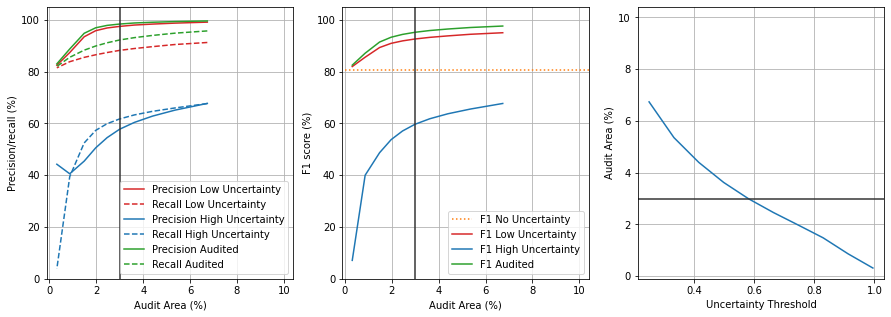

In [128]:
'''
xlim = [-0.3, 12.7]
xlim = [-0.1, 10.4]

ylim = [0, 105]
'''
manager.plotUncertaintyAA(normalize_xlim=False)

In [129]:
from scipy import optimize  

def getOptimalUncertaintyThreshold(self, AA = 0.03, bounds = None):

    def getAAFromUncertaintyThreshold(threshold): 
        print(threshold)
        metrics_values2 = _metrics.getAA_Recall(self.uncertainty, 
                        self.label_mask_current_deforestation_test, 
                        self.predicted_test, [threshold])
        return np.abs(AA - metrics_values2[:,3].squeeze())
    if bounds is None:
        bounds = (np.min(self.uncertainty) + 0.0015, np.max(self.uncertainty)-0.0015)
    
    ic(bounds)
    minimum = optimize.minimize_scalar(getAAFromUncertaintyThreshold, 
        method='bounded', bounds=bounds, tol=0.0001)
    self.threshold_optimal = minimum.x
    ic(self.threshold_optimal)

In [130]:

import types

manager.getOptimalUncertaintyThreshold = types.MethodType(getOptimalUncertaintyThreshold, manager)


In [131]:
manager.getOptimalUncertaintyThreshold(bounds = (np.min(manager.uncertainty)+0.0000001, np.max(manager.uncertainty)-0.01))

ic| 2231348037.py:14 in getOptimalUncertaintyThreshold()
    bounds: (0.1666667716337204, 0.99)


c:\Users\jchamorro\Anaconda3\envs\tf2\lib\site-packages\scipy\optimize\_minimize.py:783: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  warn("Method 'bounded' does not support relative tolerance in x; "


0.4811520808024601
threshold 0.4811520808024601


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (2037553,)
    predicted_test_classified_incorrect.shape: (2037553,)
ic| metrics.py:301 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 2037553
    len(label_mask_current_deforestation_test): 54091459
ic| metrics.py:303 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 2037553
    len(label_mask_current_deforestation_test): 54091459


[0.98111128 0.89092052 0.54464055 0.03766866 0.60921069 0.63610707
 0.10514024]
0.6755146908312601
threshold 0.6755146908312601


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (1292371,)
    predicted_test_classified_incorrect.shape: (1292371,)
ic| metrics.py:301 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1292371
    len(label_mask_current_deforestation_test): 54091459
ic| metrics.py:303 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1292371
    len(label_mask_current_deforestation_test): 54091459


[0.9678205  0.87286937 0.61728227 0.02389233 0.54029062 0.59627985
 0.14254582]
0.7956373899711998
threshold 0.7956373899711998


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (913854,)
    predicted_test_classified_incorrect.shape: (913854,)
ic| metrics.py:301 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 913854
    len(label_mask_current_deforestation_test): 54091459
ic| metrics.py:303 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 913854
    len(label_mask_current_deforestation_test): 54091459


[0.94799185 0.85978095 0.6716726  0.01689461 0.47618174 0.54943043
 0.16585396]
0.5973851964724488
threshold 0.5973851964724488


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (1558116,)
    predicted_test_classified_incorrect.shape: (1558116,)
ic| metrics.py:301 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1558116
    len(label_mask_current_deforestation_test): 54091459
ic| metrics.py:303 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1558116
    len(label_mask_current_deforestation_test): 54091459


[0.9740115  0.88077503 0.58715535 0.02880521 0.57163294 0.61411684
 0.12714842]
0.5849154917534971
threshold 0.5849154917534971


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (1603355,)
    predicted_test_classified_incorrect.shape: (1603355,)
ic| metrics.py:301 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1603355
    len(label_mask_current_deforestation_test): 54091459
ic| metrics.py:303 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1603355
    len(label_mask_current_deforestation_test): 54091459


[0.97475634 0.88200544 0.58247463 0.02964156 0.57623515 0.61662139
 0.12476535]
0.545281395558824
threshold 0.545281395558824


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (1756252,)
    predicted_test_classified_incorrect.shape: (1756252,)
ic| metrics.py:301 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1756252
    len(label_mask_current_deforestation_test): 54091459
ic| metrics.py:303 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1756252
    len(label_mask_current_deforestation_test): 54091459


[0.97730054 0.88547316 0.5680196  0.03246819 0.58949563 0.62441514
 0.11716192]
0.5766258993449596
threshold 0.5766258993449596


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (1634253,)
    predicted_test_classified_incorrect.shape: (1634253,)
ic| metrics.py:301 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1634253
    len(label_mask_current_deforestation_test): 54091459
ic| metrics.py:303 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1634253
    len(label_mask_current_deforestation_test): 54091459


[0.97528701 0.88274887 0.57938822 0.03021277 0.5791665  0.61833105
 0.12316405]
0.5770856696437636
threshold 0.5770856696437636


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (1632529,)
    predicted_test_classified_incorrect.shape: (1632529,)
ic| metrics.py:301 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1632529
    len(label_mask_current_deforestation_test): 54091459
ic| metrics.py:303 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1632529
    len(label_mask_current_deforestation_test): 54091459


[0.97525321 0.88268867 0.57954357 0.0301809  0.57902697 0.61827618
 0.12324535]
0.5799789780589101
threshold 0.5799789780589101


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (1621561,)
    predicted_test_classified_incorrect.shape: (1621561,)
ic| metrics.py:301 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1621561
    len(label_mask_current_deforestation_test): 54091459
ic| metrics.py:303 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1621561
    len(label_mask_current_deforestation_test): 54091459


[0.97506871 0.88243907 0.58063505 0.02997813 0.57799212 0.61765655
 0.12381551]
0.581864558504313
threshold 0.581864558504313


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (1614556,)
    predicted_test_classified_incorrect.shape: (1614556,)
ic| metrics.py:301 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1614556
    len(label_mask_current_deforestation_test): 54091459
ic| metrics.py:303 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1614556
    len(label_mask_current_deforestation_test): 54091459


[0.97496378 0.88224613 0.58132319 0.02984863 0.57732544 0.61731206
 0.12417538]
0.5795945367197981
threshold 0.5795945367197981


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (1622972,)
    predicted_test_classified_incorrect.shape: (1622972,)
ic| metrics.py:301 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1622972
    len(label_mask_current_deforestation_test): 54091459
ic| metrics.py:303 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1622972
    len(label_mask_current_deforestation_test): 54091459


[0.97509201 0.88246773 0.58049879 0.03000422 0.57812139 0.61773748
 0.12374009]
0.5786362347700085
threshold 0.5786362347700085


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (1626617,)
    predicted_test_classified_incorrect.shape: (1626617,)
ic| metrics.py:301 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1626617
    len(label_mask_current_deforestation_test): 54091459
ic| metrics.py:303 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1626617
    len(label_mask_current_deforestation_test): 54091459


[0.9751605  0.88257926 0.58016085 0.03007161 0.57843126 0.61788356
 0.12356075]
0.5795215924952066
threshold 0.5795215924952066


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (1623239,)
    predicted_test_classified_incorrect.shape: (1623239,)
ic| metrics.py:301 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1623239
    len(label_mask_current_deforestation_test): 54091459
ic| metrics.py:303 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1623239
    len(label_mask_current_deforestation_test): 54091459


[0.975095   0.88247236 0.58046336 0.03000916 0.57815796 0.61776229
 0.12372586]
0.5796943263749396
threshold 0.5796943263749396


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (1622622,)
    predicted_test_classified_incorrect.shape: (1622622,)
ic| metrics.py:301 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1622622
    len(label_mask_current_deforestation_test): 54091459
ic| metrics.py:303 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1622622
    len(label_mask_current_deforestation_test): 54091459


[0.97508657 0.88246029 0.58052876 0.02999775 0.57809326 0.61772121
 0.12375906]
0.5796609844433499
threshold 0.5796609844433499


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (1622744,)
    predicted_test_classified_incorrect.shape: (1622744,)
ic| metrics.py:301 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1622744
    len(label_mask_current_deforestation_test): 54091459
ic| metrics.py:303 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1622744
    len(label_mask_current_deforestation_test): 54091459
ic| 2231348037.py:18 in getOptimalUncertaintyThreshold()
    self.threshold_optimal: 0.5796609844433499


[0.97508835 0.88246199 0.58051786 0.03       0.57810369 0.61772847
 0.12375212]


In [132]:
manager.getUncertaintyMetricsFromOptimalThreshold()

threshold:  0.5796609844433499
threshold 0.5796609844433499


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (1622744,)
    predicted_test_classified_incorrect.shape: (1622744,)
ic| metrics.py:301 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1622744
    len(label_mask_current_deforestation_test): 54091459
ic| metrics.py:303 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1622744
    len(label_mask_current_deforestation_test): 54091459


[0.97508835 0.88246199 0.58051786 0.03       0.57810369 0.61772847
 0.12375212]
threshold 0.5796609844433499
(54091459,) (54091459,)


ic| base.py:878 in getUncertaintyMetricsFromOptimalThreshold()
    self.m_optimal: {'AA': array([0.03]),
                     'UEO': array([0.12375212]),
                     'f1': 80.76,
                     'f1_H': array([0.59725958]),
                     'f1_L': array([0.92646578]),
                     'precision_H': array([0.57810369]),
                     'precision_L': array([0.97508835]),
                     'recall_H': array([0.61772847]),
                     'recall_L': array([0.88246199]),
                     'recall_Ltotal': array([0.58051786])}
ic| base.py:879 in getUncertaintyMetricsFromOptimalThreshold()
    self.m_audited_optimal: {'f1': array([0.95243782]),
                             'precision': array([0.9841803]),
                             'recall': array([0.92267892])}


cm_audited [[53346713    10884]
 [   56743   677119]]
[0.9841803  0.92267892]


{'metrics': {'precision_L': array([0.97508835]),
  'recall_L': array([0.88246199]),
  'recall_Ltotal': array([0.58051786]),
  'AA': array([0.03]),
  'precision_H': array([0.57810369]),
  'recall_H': array([0.61772847]),
  'UEO': array([0.12375212]),
  'f1_L': array([0.92646578]),
  'f1_H': array([0.59725958]),
  'f1': 80.76},
 'metrics_audited': {'precision': array([0.9841803]),
  'recall': array([0.92267892]),
  'f1': array([0.95243782])},
 'exp': 48}

In [133]:
print("A")

A
